In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import plotly.express as px
import plotly.graph_objects as go
import datetime

#import missingno as msno
#from collections import Counter

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly import tools

#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import StandardScaler
##from sklearn.decomposition import PCA
#from sklearn.cluster import KMeans
#from sklearn.cluster import AgglomerativeClustering

pd.set_option('display.max_columns', None)

In [2]:
#https://www.kaggle.com/code/sonalisingh1411/customer-personality-analysis-segmentation
#https://www.kaggle.com/code/heyrobin/customer-segmentation-christmas-theme
#https://www.kaggle.com/code/webber0923/customer-dashboard-using-plotly

In [3]:
main_df = pd.read_csv('1. Conversion Rate Analysis Based on Income, Spending and Age\marke.csv')

## Pemahaman Data

In [4]:
print(f'Data Set Memiliki {main_df.shape[0]} baris dan {main_df.shape[1]} kolom')

Data Set Memiliki 2240 baris dan 30 kolom


In [5]:
print(f'Tipe Data {main_df.dtypes.value_counts()[0]} int, {main_df.dtypes.value_counts()[1]} object, and {main_df.dtypes.value_counts()[2]} float')

Tipe Data 26 int, 3 object, and 1 float


In [6]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

#### Variabel Dt_Customer Seharusnya Memiliki Tipe Data Date

In [7]:
df = main_df.copy()
df.head(5).style.background_gradient(cmap='PuBuGn')

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.000000,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.000000,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.000000,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.000000,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.000000,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### STATISTIK DASAR

In [8]:
df.describe().style.background_gradient(cmap='PuBuGn')

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1119.500000,5592.159821,1968.805804,52247251.353791,0.444196,0.506250,49.109375,303935.714286,26302.232143,166950.000000,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.000000,11.000000,0.149107
std,646.776623,3246.662198,11.984069,25173076.660901,0.538398,0.544538,28.962453,336597.392605,39773.433765,225715.372512,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.000000,0.000000,0.356274
min,0.000000,0.000000,1893.000000,1730000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
25%,559.750000,2828.250000,1959.000000,35303000.000000,0.000000,0.000000,24.000000,23750.000000,1000.000000,16000.000000,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
50%,1119.500000,5458.500000,1970.000000,51381500.000000,0.000000,0.000000,49.000000,173500.000000,8000.000000,67000.000000,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
75%,1679.250000,8427.750000,1977.000000,68522000.000000,1.000000,1.000000,74.000000,504250.000000,33000.000000,232000.000000,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
max,2239.000000,11191.000000,1996.000000,666666000.000000,2.000000,2.000000,99.000000,1493000.000000,199000.000000,1725000.000000,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,11.000000,1.000000


In [9]:
df['Conversion_Rate'] = (df['NumWebPurchases'] / (df['NumWebVisitsMonth'] * 24)) * 100
##df = df.fillna(0)

inf_index = df[df['Conversion_Rate'] == float("inf")].index
df = df.drop(inf_index)

In [10]:
df['Education'].unique()

array(['S1', 'S3', 'S2', 'SMA', 'D3'], dtype=object)

In [11]:
#df['Education'] = df['Education'].replace(['S1','S3','S2'],'Sarjana')  
#df['Education'] = df['Education'].replace(['SMA','D3'], 'Bukan Sarjana')

In [12]:
week1_education = df.groupby('Education').agg('mean').reset_index()[['Education', 'Conversion_Rate']]
week1_education

,Education,Conversion_Rate
0,D3,3.805246
1,S1,4.746984
2,S2,4.463961
3,S3,4.852493
4,SMA,1.133096


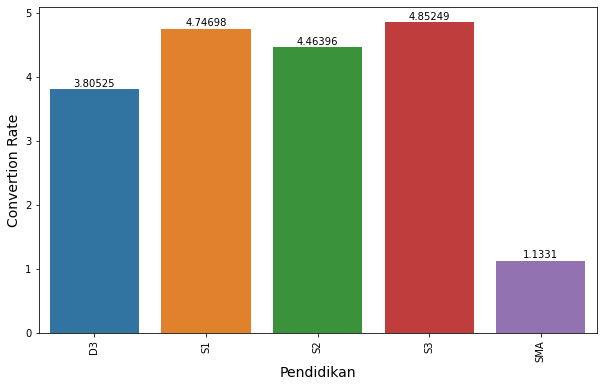

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='Education', y='Conversion_Rate', data=week1_education)

plt.xlabel('Pendidikan', fontsize=14)
plt.ylabel('Convertion Rate', fontsize=14)
plt.bar_label(ax.containers[0], padding=1)

#plt.tight_layout()
plt.savefig('ua_bar.png')
plt.xticks(rotation = 90)
plt.show()


In [14]:
### Analisa Pada Kategori Umur

In [15]:
x = datetime.datetime.now()
kategori_umur = []
for i in (int(x.strftime("%Y"))-df['Year_Birth']):
    if i >= 0 and i <= 5 :
        kategori = 'Balita'
    elif i >= 5 and i <= 11 :
        kategori = 'Kanak-kanak'
    elif i >= 12 and i <= 16 :
        kategori = 'Remaja Awal'
    elif i >= 17 and i <= 25 :
        kategori = 'Remaja Akhir'
    elif i >= 26 and i <= 35 :
        kategori = 'Dewasa Awal'
    elif i >= 36 and i <= 45 :
        kategori = 'Dewasa Akhir'
    elif i >= 46 and i <= 55 :
        kategori = 'Lansia Awal'
    elif i >= 56 and i <= 65 :
        kategori = 'Lansia Akhir'
    else:
        kategori = 'Manula'
    kategori_umur.append(kategori)
df['kategori_umur'] = kategori_umur
df.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Conversion_Rate,kategori_umur
572,572,8181,1978,D3,Lajang,38593000.0,1,0,13-09-2013,42,51000,12000,49000,17000,24000,24000,3,4,1,3,8,0,0,0,0,0,0,3,11,0,2.083333,Dewasa Akhir
917,917,8362,1982,S3,Menikah,84169000.0,0,0,07-08-2013,9,1478000,19000,403000,0,19000,0,1,7,6,6,3,0,1,1,0,0,0,3,11,1,9.722222,Dewasa Akhir
1976,1976,5117,1963,D3,Menikah,32632000.0,0,0,02-08-2012,32,63000,151000,137000,153000,19000,53000,2,4,4,8,5,0,0,0,0,0,0,3,11,0,3.333333,Lansia Akhir
825,825,5989,1959,D3,Cerai,78353000.0,0,1,16-04-2013,51,752000,122000,476000,39000,153000,34000,1,10,2,11,8,0,0,0,0,0,0,3,11,0,5.208333,Lansia Akhir
1112,1112,10022,1973,S3,Lajang,54466000.0,1,1,09-02-2014,78,12000,0,4000,0,0,0,1,1,0,2,5,0,0,0,0,0,0,3,11,0,0.833333,Lansia Awal


In [16]:
week1_umur = df.groupby('kategori_umur').agg('mean').reset_index()[['kategori_umur', 'Conversion_Rate']]
week1_umur

,kategori_umur,Conversion_Rate
0,Dewasa Akhir,4.026042
1,Dewasa Awal,4.732514
2,Lansia Akhir,4.686748
3,Lansia Awal,4.010689
4,Manula,5.825846


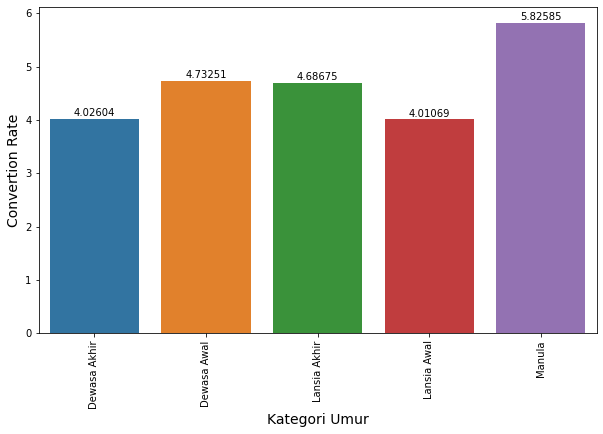

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='kategori_umur', y='Conversion_Rate', data=week1_umur)

plt.xlabel('Kategori Umur', fontsize=14)
plt.ylabel('Convertion Rate', fontsize=14)
plt.bar_label(ax.containers[0], padding=1)

#plt.tight_layout()
plt.savefig('kategori_umur.png')
plt.xticks(rotation = 90)
plt.show()


### Analisa Pada Variable Marital_Status

In [18]:
df['Marital_Status'].unique()

array(['Lajang', 'Bertunangan', 'Menikah', 'Cerai', 'Janda', 'Duda'],
      dtype=object)

In [19]:
#REPLACING THE CONFLICT VALUES IN Marital_status..
#df['Marital_Status'] = df['Marital_Status'].replace(['Bertunangan','Lajang'],'Belum Menikah')
#df['Marital_Status'] = df['Marital_Status'].replace(['Cerai','Janda', 'Duda'],'Cerai')

In [20]:
week1_marital = df.groupby('Marital_Status').agg('mean').reset_index()[['Marital_Status', 'Conversion_Rate']]
week1_marital

,Marital_Status,Conversion_Rate
0,Bertunangan,4.408768
1,Cerai,4.427889
2,Duda,2.881944
3,Janda,5.312500
4,Lajang,4.830029
5,Menikah,4.459700


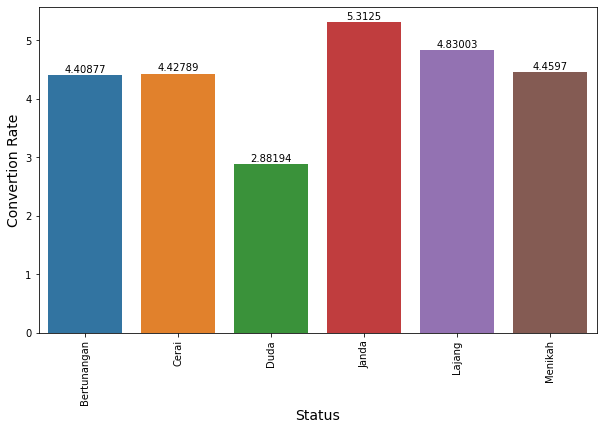

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='Marital_Status', y='Conversion_Rate', data=week1_marital)

plt.xlabel('Status', fontsize=14)
plt.ylabel('Convertion Rate', fontsize=14)
plt.bar_label(ax.containers[0], padding=1)

#plt.tight_layout()
plt.savefig('status_pernikahan.png')
plt.xticks(rotation = 90)
plt.show()


In [26]:
df['Kids'] = df['Kidhome'] + df['Teenhome']

In [27]:
print("Unique categories present in the Kids:",df['Kids'].value_counts())
print("\n")

Unique categories present in the Kids: 1    1128
0     633
2     420
3      53
Name: Kids, dtype: int64




In [28]:
week1_Kids = df.groupby('Kids').agg('mean').reset_index()[['Kids', 'Conversion_Rate']]
week1_Kids

,Kids,Conversion_Rate
0,0,7.914959
1,1,3.679106
2,2,2.189464
3,3,1.850510


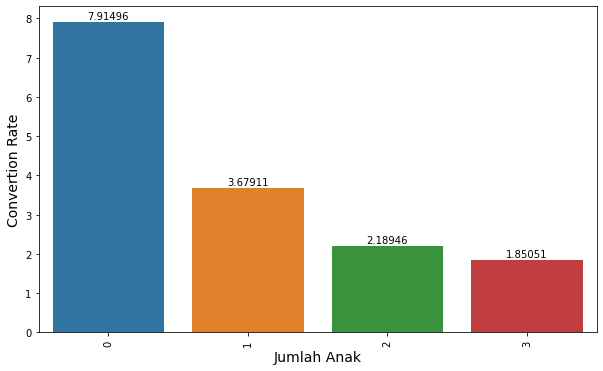

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='Kids', y='Conversion_Rate', data=week1_Kids)

plt.xlabel('Jumlah Anak', fontsize=14)
plt.ylabel('Convertion Rate', fontsize=14)
plt.bar_label(ax.containers[0], padding=1)

#plt.tight_layout()
plt.savefig('status_jumlah_anak.png')
plt.xticks(rotation = 90)
plt.show()
